### Import the breast cancer dataset

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### Read the data

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = cancer.target

### Split your data into training and test data and scale the data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = cancer.feature_names)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
1,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
2,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
3,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
4,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351


In [11]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

### Conduct PCA

First look at PCA with all features

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(random_state=42)

In [15]:
pca.fit(X_train_scaled, y_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# Look at the eigenvector matrix
W = pd.DataFrame(pca.components_)
W.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.216062,0.102568,0.225108,0.218835,0.148042,0.239289,0.259190,0.262463,0.150702,0.060383,...,0.225746,0.106346,0.235604,0.223532,0.130331,0.207974,0.231769,0.251481,0.125004,0.125050
1,-0.238263,-0.052822,-0.220454,-0.234486,0.173699,0.155455,0.058801,-0.038336,0.175833,0.363505,...,-0.223358,-0.038362,-0.202404,-0.221678,0.167145,0.152700,0.098355,-0.003334,0.119911,0.287219
2,-0.009084,0.051747,-0.009745,0.028189,-0.126745,-0.070951,0.006961,-0.034010,-0.047283,-0.020070,...,-0.052570,-0.061167,-0.053036,-0.016765,-0.278990,-0.227698,-0.168985,-0.179021,-0.278582,-0.221823
3,-0.044119,0.609578,-0.045740,-0.058886,-0.126716,-0.040412,-0.039446,-0.060240,0.021964,-0.065859,...,-0.015588,0.637117,-0.014413,-0.030572,-0.015423,0.063668,0.029997,-0.001246,0.096895,0.019384
4,0.045300,0.027326,0.045169,0.012510,-0.387394,0.008865,0.086345,-0.049953,-0.284867,-0.066128,...,0.010499,-0.006694,0.026388,-0.014662,-0.320148,0.140450,0.203911,0.046967,-0.222893,0.087792


In [17]:
# Look at your newly created matrix
T = pd.DataFrame(pca.transform(X_train_scaled))
T.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-4.307702,-1.878763,-0.096336,-1.788554,1.707234,0.541122,0.167312,0.537814,0.324546,-0.256925,...,0.045635,-0.012573,-0.018051,-0.016577,-0.020525,-0.066514,0.002242,0.012537,0.017129,0.002845
1,2.370195,2.003231,-2.412576,0.363958,-0.468697,-0.138808,0.582370,-0.641868,-0.575915,-0.009327,...,-0.288648,0.080004,-0.231688,-0.004514,-0.112774,0.023100,0.087801,-0.037174,0.024065,0.003538
2,-1.928674,-0.229950,0.699843,0.469417,1.078276,2.370342,0.272698,-0.064284,-0.016542,0.046921,...,-0.060491,0.041572,0.034578,0.121731,-0.040953,-0.047373,0.037921,-0.008948,-0.003258,-0.010614
3,3.373326,-1.657578,-1.951035,2.376400,1.024938,-0.902455,-0.231240,-0.030687,-0.050130,-0.287160,...,-0.206672,0.264132,0.044583,-0.093531,-0.085377,0.089555,0.018777,-0.019858,0.007203,-0.005958
4,4.897018,-3.028985,2.573167,-0.015154,0.186734,0.931497,-1.394939,0.296776,-0.510443,-1.357816,...,0.024898,0.061594,0.272335,0.105574,0.049492,0.058647,-0.063881,0.020361,-0.017806,0.042896


In [18]:
import numpy as np
T_reconstructed = np.matmul(X_train_scaled, np.transpose(W))

In [19]:
T_reconstructed.sort_index().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-4.307702,-1.878763,-0.096336,-1.788554,1.707234,0.541122,0.167312,0.537814,0.324546,-0.256925,...,0.045635,-0.012573,-0.018051,-0.016577,-0.020525,-0.066514,0.002242,0.012537,0.017129,0.002845
1,2.370195,2.003231,-2.412576,0.363958,-0.468697,-0.138808,0.582370,-0.641868,-0.575915,-0.009327,...,-0.288648,0.080004,-0.231688,-0.004514,-0.112774,0.023100,0.087801,-0.037174,0.024065,0.003538
2,-1.928674,-0.229950,0.699843,0.469417,1.078276,2.370342,0.272698,-0.064284,-0.016542,0.046921,...,-0.060491,0.041572,0.034578,0.121731,-0.040953,-0.047373,0.037921,-0.008948,-0.003258,-0.010614
3,3.373326,-1.657578,-1.951035,2.376400,1.024938,-0.902455,-0.231240,-0.030687,-0.050130,-0.287160,...,-0.206672,0.264132,0.044583,-0.093531,-0.085377,0.089555,0.018777,-0.019858,0.007203,-0.005958
4,4.897018,-3.028985,2.573167,-0.015154,0.186734,0.931497,-1.394939,0.296776,-0.510443,-1.357816,...,0.024898,0.061594,0.272335,0.105574,0.049492,0.058647,-0.063881,0.020361,-0.017806,0.042896


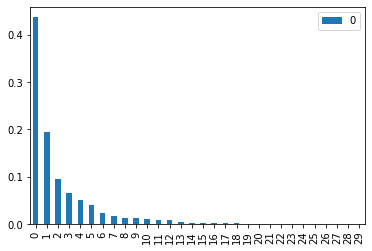

In [20]:
# Plot the explained variance by all the features
pd.DataFrame(pca.explained_variance_ratio_).plot.bar() #!!!!

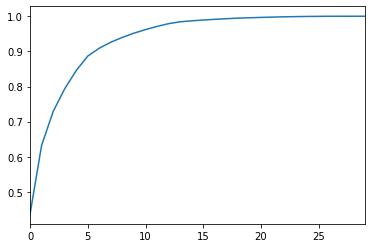

In [22]:
# Look at a cummulative plot
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot() # around 6-7 components 90% of the data will be explained

### Chose the first five principal components as they explain up to 90% of the variance

In [26]:
pca5 = PCA(n_components=.9) #number of components or percentage
pca5.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
pca5.explained_variance_ratio_

array([0.4373648 , 0.1953137 , 0.09618005, 0.06482796, 0.05180713,
       0.04118451, 0.0225213 ])

In [28]:
W5 = pd.DataFrame(pca5.components_, columns=cancer.feature_names)

In [29]:
T5 = pd.DataFrame(pca5.transform(X_train))

In [31]:
W5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.216062,0.102568,0.225108,0.218835,0.148042,0.239289,0.259190,0.262463,0.150702,0.060383,...,0.225746,0.106346,0.235604,0.223532,0.130331,0.207974,0.231769,0.251481,0.125004,0.125050
1,-0.238263,-0.052822,-0.220454,-0.234486,0.173699,0.155455,0.058801,-0.038336,0.175833,0.363505,...,-0.223358,-0.038362,-0.202404,-0.221678,0.167145,0.152700,0.098355,-0.003334,0.119911,0.287219
2,-0.009084,0.051747,-0.009745,0.028189,-0.126745,-0.070951,0.006961,-0.034010,-0.047283,-0.020070,...,-0.052570,-0.061167,-0.053036,-0.016765,-0.278990,-0.227698,-0.168985,-0.179021,-0.278582,-0.221823
3,-0.044119,0.609578,-0.045740,-0.058886,-0.126716,-0.040412,-0.039446,-0.060240,0.021964,-0.065859,...,-0.015588,0.637117,-0.014413,-0.030572,-0.015423,0.063668,0.029997,-0.001246,0.096895,0.019384
4,0.045300,0.027326,0.045169,0.012510,-0.387394,0.008865,0.086345,-0.049953,-0.284867,-0.066128,...,0.010499,-0.006694,0.026388,-0.014662,-0.320148,0.140450,0.203911,0.046967,-0.222893,0.087792
5,0.029042,-0.109488,0.025227,0.002399,-0.269573,-0.019554,-0.015893,-0.037195,0.345286,-0.122082,...,0.003355,-0.114391,0.010921,-0.029530,-0.346836,0.055647,0.020637,-0.011593,0.503075,-0.066024
6,-0.153885,0.005170,-0.142673,-0.079482,-0.115288,0.016139,-0.075814,-0.161776,-0.090957,0.267547,...,-0.038035,0.034227,-0.022877,0.036448,-0.103209,0.153665,0.012695,-0.137281,-0.013616,0.344110


### Run a logisitc regression on all the original features

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression(random_state=42)

In [34]:
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9859154929577465, 0.9790209790209791)

### Run a logistic regression on the 7 Principal Components

In [41]:
T_train = pd.DataFrame(pca5.transform(X_train_scaled))
T_test = pd.DataFrame(pca5.transform(X_test_scaled))

In [42]:
lr_pca = LogisticRegression(random_state=42)

lr_pca.fit(T_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
lr_pca.score(T_train, y_train), lr_pca.score(T_test, y_test)

(0.9741784037558685, 0.986013986013986)

In [38]:
plot = pd.concat((T_train, pd.DataFrame(y_train, columns=['cancer'])), axis=1)

In [39]:
plot.head()

,0,1,2,3,4,5,6,cancer
0,-4.307702,-1.878763,-0.096336,-1.788554,1.707234,0.541122,0.167312,1
1,2.370195,2.003231,-2.412576,0.363958,-0.468697,-0.138808,0.582370,0
2,-1.928674,-0.229950,0.699843,0.469417,1.078276,2.370342,0.272698,1
3,3.373326,-1.657578,-1.951035,2.376400,1.024938,-0.902455,-0.231240,0
4,4.897018,-3.028985,2.573167,-0.015154,0.186734,0.931497,-1.394939,0


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


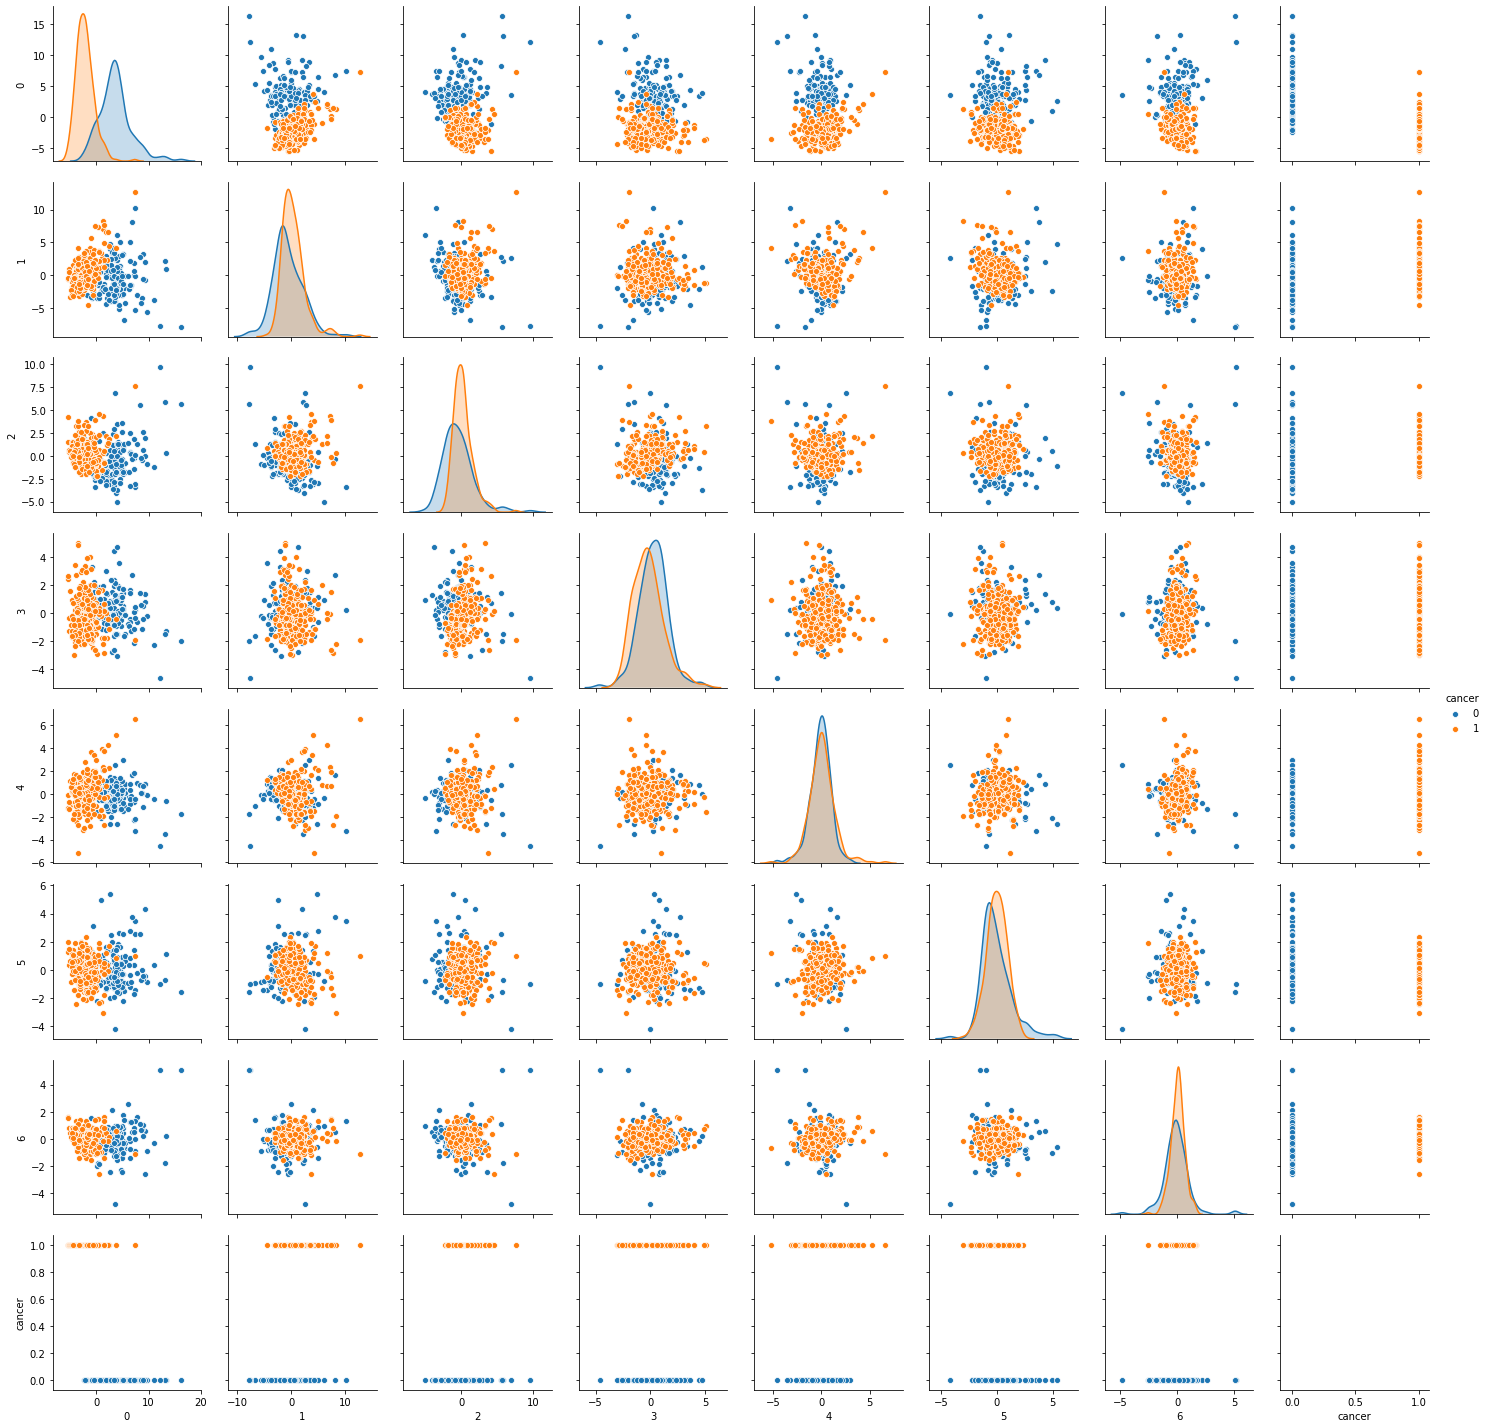

In [40]:
sns.pairplot(plot, hue='cancer')